In [2]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, chisquare
import pandas as pd


In [3]:
with open('data/text_structured/accumulation-accounts-2008-2023-provisional.csv') as f:
    text = f.read()

In [4]:
char_freq = Counter(text)
char_freq.most_common(5)

[('0', 384775), ('n', 340342), (' ', 325601), ('i', 310935), ('a', 288832)]

In [5]:
char_entropy = 0

for freq in char_freq.values():
    prob = freq / len(text)
    char_entropy -= prob * np.log2(prob)

max_char_entropy = np.log2(len(char_freq))

print(f'Entropy: {char_entropy:.4f} bits per character')
print(f'Max Entropy: {max_char_entropy:.4f} bits per character')
print(f'{char_entropy / max_char_entropy * 100:.2f}% of maximum entropy')

Entropy: 4.8041 bits per character
Max Entropy: 5.9773 bits per character
80.37% of maximum entropy


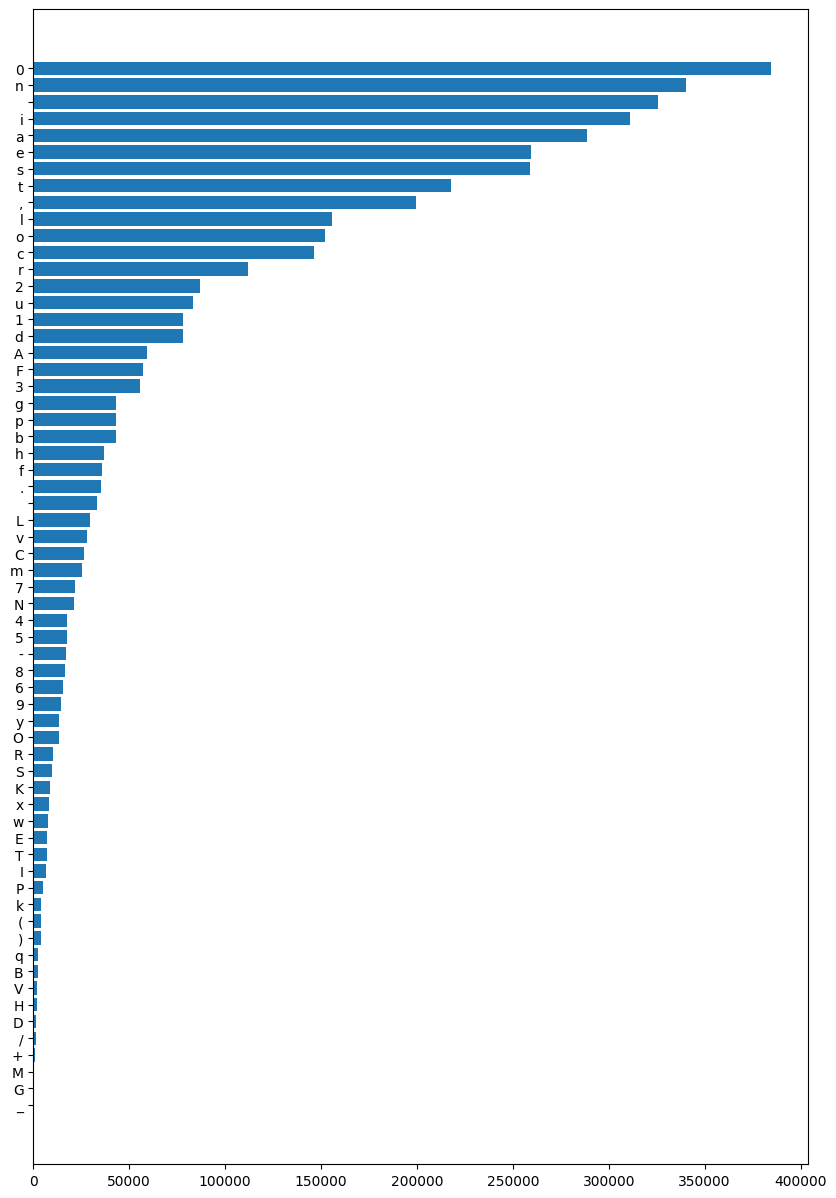

In [6]:
chars, freqs = zip(*char_freq.most_common())
plt.figure(figsize=(10, 15))
plt.barh(chars[::-1], freqs[::-1])
plt.show()


In [7]:
char_distribution_skewness = skew(freqs)
char_distribution_skewness


np.float64(1.7792148636271827)

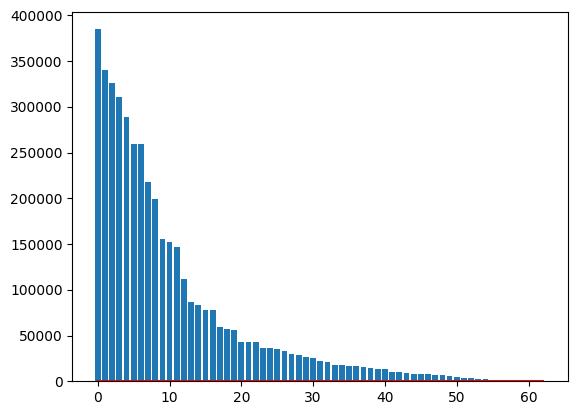

In [8]:
p = 1 / np.mean(freqs)
x = np.linspace(0, len(chars) - 1, len(chars))
y = len(text) * p * (1 - p) ** x
plt.bar(range(len(chars)), freqs)
plt.plot(x, y, color='red')
plt.show()

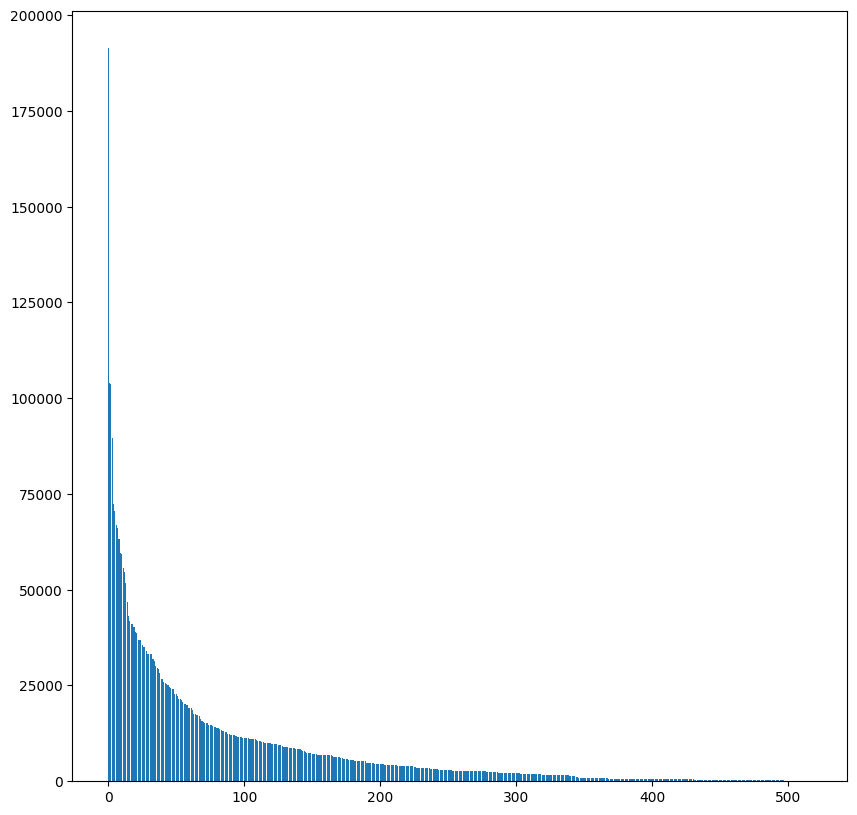

In [9]:

byte_pairs = [text[i-1] + text[i] for i in range(1, len(text))]
byte_pair_freq = Counter(byte_pairs)
plt.figure(figsize=(10, 10))
plt.bar(range(len(byte_pair_freq)), [freq for _, freq in byte_pair_freq.most_common()])
plt.show()

0.048423457272536
0.048423457272536


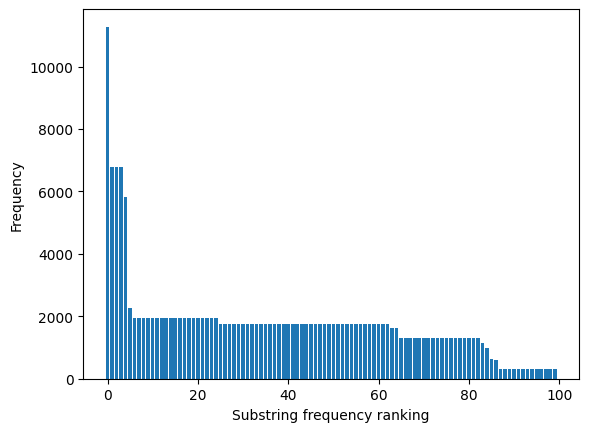

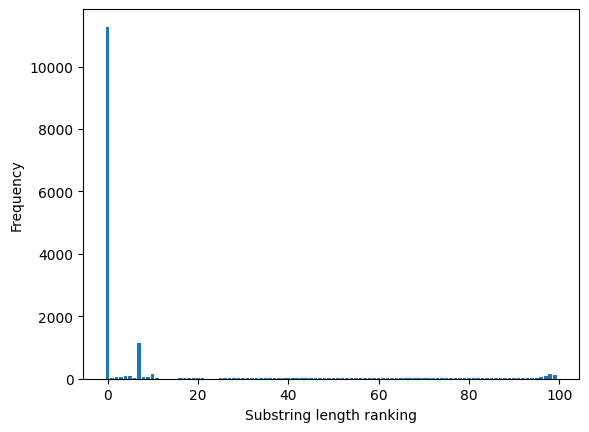

In [ ]:
df = pd.read_csv('data/text_structured/accumulation-accounts-2008-2023-provisional.csv')
value_freq = df.melt()['value'].value_counts()
value_freq_sorted_by_len = value_freq.sort_index(key=lambda x: x.str.len())
value_freq = value_freq[:100]
value_freq_sorted_by_len = value_freq_sorted_by_len[:100]

plt.bar(range(len(value_freq)), value_freq.values)
plt.xlabel('Substring frequency ranking')
plt.ylabel('Frequency')
plt.show()
plt.bar(range(len(value_freq_sorted_by_len)), value_freq_sorted_by_len.values)
plt.xlabel('Substring length ranking')
plt.ylabel('Frequency')
plt.show()